Objet detection - ID Card Text

env
- conda create --name yolo_env python=3.9 -y
- CPU: conda install pytorch torchvision torchaudio cpuonly -c pytorch -y
- GPU: conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia -y
- pip install ultralytics opencv-python numpy matplotlib

In [ ]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2
import os
import numpy as np
from PIL import Image
! pip install roboflow

  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
    --------------------------------------- 0.5/38.8 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.5/38.8 MB 1.1 MB/s eta 0:00:35
   - -------------------------------------- 1.0/38.8 MB 1.4 MB/s eta 0:00:27
   - -------------------------------------- 1.3/38.8 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.6/38.8 MB 1.4 MB/s eta 0:00:28
   - -------------------------------------- 1.8/38.8 MB 1.3 MB/s eta 0:00:28
   -- ------------------------------------- 2.1/38.8 MB 1.3 MB/s eta 0:00:28
   -- ------------------------------------- 2.4/38.8 MB 1.3 MB/s eta 0:00:29
   -- ------------------------------------- 2.6/38.8 MB 1.3 MB/s eta 0:00:28
   -- ---------------

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\HP\\anaconda3\\envs\\yolo_env\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



- Yolo à 5 versions pour chaque catégorie
- plus la version est lourde et plus elle est précise
- <img src="image/image1.png" alt="image">

In [2]:
#On instancie yoloV8n.pt pour la détection
model = YOLO("yolov8n.pt")

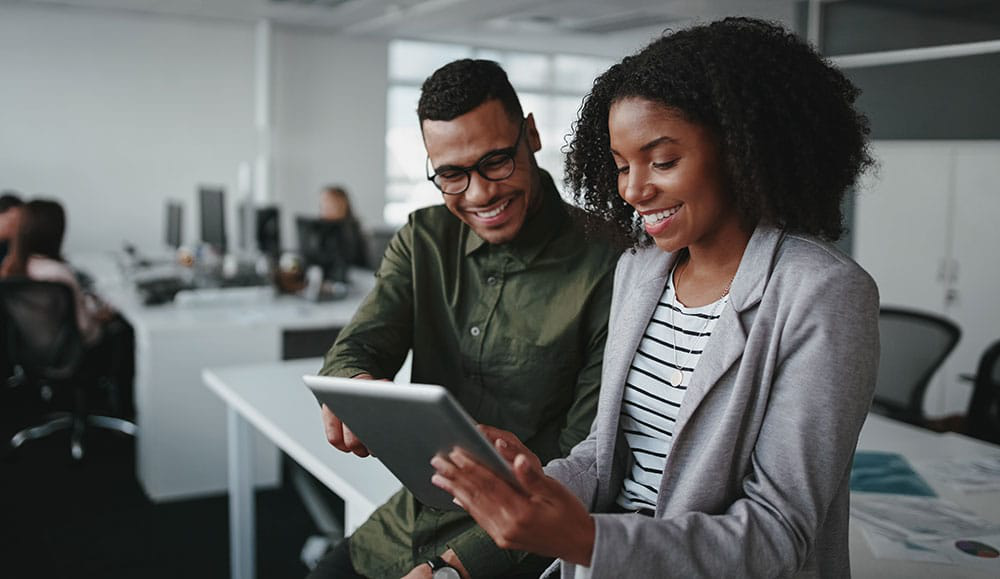

In [4]:
#Récupére une image depuis le net
response = requests.get("https://www.lecoindesentrepreneurs.fr/wp-content/uploads/2022/08/se-lancer-a-deux-dans-une-entreprise.jpg")
image = Image.open(BytesIO(response.content))
image

In [5]:
# Convertie l'image en matrice
image = np.asarray(image)
image

array([[[117, 125, 128],
        [116, 124, 127],
        [116, 124, 127],
        ...,
        [ 30,  32,  31],
        [ 30,  32,  31],
        [ 30,  32,  31]],

       [[117, 125, 128],
        [117, 125, 128],
        [116, 124, 127],
        ...,
        [ 30,  32,  31],
        [ 30,  32,  31],
        [ 30,  32,  31]],

       [[117, 125, 128],
        [117, 125, 128],
        [117, 125, 128],
        ...,
        [ 30,  32,  31],
        [ 30,  32,  31],
        [ 30,  32,  31]],

       ...,

       [[ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19],
        ...,
        [ 99, 101, 100],
        [ 99, 101, 100],
        [ 97,  99,  98]],

       [[ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19],
        ...,
        [ 99, 101, 100],
        [ 99, 101, 100],
        [ 97,  99,  98]],

       [[ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19],
        ...,
        [ 99, 101, 100],
        [ 99, 101, 100],
        [ 97,  99,  98]]

In [6]:
results = model.predict(image)
results[0].boxes.data


0: 384x640 2 persons, 2 chairs, 1 bed, 1 laptop, 1 book, 166.5ms
Speed: 14.2ms preprocess, 166.5ms inference, 16.4ms postprocess per image at shape (1, 3, 384, 640)


tensor([[3.0466e+02, 5.6565e+01, 6.3315e+02, 5.7483e+02, 8.5234e-01, 0.0000e+00],
        [3.3574e+02, 2.0015e+01, 8.8379e+02, 5.7126e+02, 8.3211e-01, 0.0000e+00],
        [4.2621e-01, 2.7178e+02, 1.3776e+02, 4.6169e+02, 6.2889e-01, 5.6000e+01],
        [8.7225e+02, 3.0349e+02, 9.6406e+02, 4.2770e+02, 4.1187e-01, 5.6000e+01],
        [3.1393e+02, 3.7461e+02, 6.0849e+02, 5.6690e+02, 3.8264e-01, 7.3000e+01],
        [3.1168e+02, 3.7527e+02, 6.0940e+02, 5.6731e+02, 2.8162e-01, 6.3000e+01],
        [8.4614e+02, 4.0746e+02, 9.9968e+02, 5.6964e+02, 2.7203e-01, 5.9000e+01]])

In [7]:
import cv2
import numpy as np

def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
    image = image.copy()
    lw = max(round(sum(image.shape) / 2 * 0.003), 2)
    p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
    cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)

    if label:
        tf = max(lw - 1, 1)
        w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]
        outside = p1[1] - h >= 3
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
        cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)
        cv2.putText(image, 
                    label, 
                    (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                    0,
                    lw / 3,
                    txt_color,
                    thickness=tf,
                    lineType=cv2.LINE_AA)
    return image

def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None, max_width=800):
    image = image.copy()

    if labels == []:
        labels = {0: u'person', 1: u'bicycle', 2: u'car', 3: u'motorcycle', 4: u'airplane', 5: u'bus', 
                 6: u'train', 7: u'truck', 8: u'boat', 9: u'traffic light', 10: u'fire hydrant', 
                 11: u'stop sign', 12: u'parking meter', 13: u'bench', 14: u'bird', 15: u'cat', 
                 16: u'dog', 17: u'horse', 18: u'sheep', 19: u'cow', 20: u'elephant', 21: u'bear', 
                 22: u'zebra', 23: u'giraffe', 24: u'backpack', 25: u'umbrella', 26: u'handbag', 
                 27: u'tie', 28: u'suitcase', 29: u'frisbee', 30: u'skis', 31: u'snowboard', 
                 32: u'sports ball', 33: u'kite', 34: u'baseball bat', 35: u'baseball glove', 
                 36: u'skateboard', 37: u'surfboard', 38: u'tennis racket', 39: u'bottle', 
                 40: u'wine glass', 41: u'cup', 42: u'fork', 43: u'knife', 44: u'spoon', 45: u'bowl', 
                 46: u'banana', 47: u'apple', 48: u'sandwich', 49: u'orange', 50: u'broccoli', 
                 51: u'carrot', 52: u'hot dog', 53: u'pizza', 54: u'donut', 55: u'cake', 56: u'chair', 
                 57: u'couch', 58: u'potted plant', 59: u'bed', 60: u'dining table', 61: u'toilet', 
                 62: u'tv', 63: u'laptop', 64: u'mouse', 65: u'remote', 66: u'keyboard', 
                 67: u'cell phone', 68: u'microwave', 69: u'oven', 70: u'toaster', 71: u'sink', 
                 72: u'refrigerator', 73: u'book', 74: u'clock', 75: u'vase', 76: u'scissors', 
                 77: u'teddy bear', 78: u'hair drier', 79: u'toothbrush'}

    if colors == []:
        np.random.seed(42)
        colors = np.random.randint(0, 255, size=(len(labels), 3)).tolist()

    for box in boxes:
        box = box.cpu().numpy() if hasattr(box, 'cpu') else box
        if score:
            label = f"{labels[int(box[5])]} {round(100 * float(box[4]), 1)}%"
        else:
            label = labels[int(box[5])]

        if conf:
            if box[4] > conf:
                color = colors[int(box[5])]
                image = box_label(image, box, label, color)
        else:
            color = colors[int(box[5])]
            image = box_label(image, box, label, color)

    # Redimensionner l'image si elle est trop grande
    height, width, _ = image.shape
    if width > max_width:
        ratio = max_width / width
        new_height = int(height * ratio)
        image = cv2.resize(image, (max_width, new_height))

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    cv2.imshow('YOLO Detections', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return image


On peut filtrer ces objets selon ce score.

In [9]:
plot_bboxes(image, results[0].boxes.data, score=False)
results[0].boxes.data

tensor([[3.0466e+02, 5.6565e+01, 6.3315e+02, 5.7483e+02, 8.5234e-01, 0.0000e+00],
        [3.3574e+02, 2.0015e+01, 8.8379e+02, 5.7126e+02, 8.3211e-01, 0.0000e+00],
        [4.2621e-01, 2.7178e+02, 1.3776e+02, 4.6169e+02, 6.2889e-01, 5.6000e+01],
        [8.7225e+02, 3.0349e+02, 9.6406e+02, 4.2770e+02, 4.1187e-01, 5.6000e+01],
        [3.1393e+02, 3.7461e+02, 6.0849e+02, 5.6690e+02, 3.8264e-01, 7.3000e+01],
        [3.1168e+02, 3.7527e+02, 6.0940e+02, 5.6731e+02, 2.8162e-01, 6.3000e+01],
        [8.4614e+02, 4.0746e+02, 9.9968e+02, 5.6964e+02, 2.7203e-01, 5.9000e+01]])

Utilisation du terminale

In [ ]:
# yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/dataset/train/images/'

Faisons le travail entrainant un dataset pour la détection de texte de carte d'identité

Lien du dataset : https://universe.roboflow.com/demo-rm5r8/kyc-id-detection-text-only/

On tronque notre dataset

In [36]:
import random
import os
import shutil

src_dir_image = "id_card_dataset_detection/train/images/"
dst_dir_image = "id_card_dataset_detection/train/part_images/"
src_dir_label = "id_card_dataset_detection/train/labels/"
dst_dir_label = "id_card_dataset_detection/train/part_labels/"
if not os.path.exists(dst_dir_image):
    os.makedirs(dst_dir_image)
if not os.path.exists(dst_dir_label):
    os.makedirs(dst_dir_label)

# Liste des fichiers d'images
all_images = os.listdir(src_dir_image)
print("nombre total d'image: "+str(len(all_images)))

# Choisir un pourcentage d'images à utiliser
selected_images = random.sample(all_images, int(len(all_images) * 0.05))  # 5 % des images

selected_images_dst = []
# Copier les images et les labels associés vers les nouveaux dossiers
for img in selected_images:
    # Le nom du fichier label associé à l'image
    label_file = os.path.splitext(img)[0] + ".txt"
    
    # Chemin complet de l'image et du label
    src_image_path = os.path.join(src_dir_image, img)
    dst_image_path = os.path.join(dst_dir_image, img)
    label_path = os.path.join(src_dir_label, label_file)
    dst_label_path = os.path.join(dst_dir_label, label_file)

    if os.path.exists(label_path):
        # Copier l'image vers le nouveau dossier
        shutil.copy(src_image_path, dst_image_path)
        # Copier le label vers le nouveau dossier
        shutil.copy(label_path, dst_label_path)
        # Ajouter l'image et ses labels dans les dictionnaires
        selected_images_dst.append(img)
        with open(label_path, 'r') as file:
            labels = file.readlines()

nombre total d'image: 10710


In [37]:
#Les classes du dataset
import os
# Liste pour stocker les classes uniques
class_set = set()
i=0
# Parcourir tous les fichiers de labels
for label_file in os.listdir(dst_dir_label):
    i = i+1
    # Assurez-vous que l'extension est '.txt'
    if label_file.endswith(".txt"):
        label_path = os.path.join(dst_dir_label, label_file)
        
        with open(label_path, 'r') as file:
            lines = file.readlines()
            # Pour chaque ligne, extraire l'index de la classe
            for line in lines:
                # Chaque ligne contient : <class_id> <x_center> <y_center> <width> <height>
                class_id = int(line.split()[0])  # On prend l'index de la classe
                class_set.add(class_id)  # Ajouter l'index de la classe dans l'ensemble

# Afficher les classes uniques présentes
print("Classes uniques dans le dataset :")
print(sorted(class_set))
print(i)


Classes uniques dans le dataset :
[0]
1986


In [38]:


# Paramètres
id = 12

# Charger l'image
images = os.listdir(dst_dir_image)
image_path = os.path.join(dst_dir_image, images[id])
image = Image.open(image_path)
image = np.asarray(image)

# Charger le label
labels = os.listdir(dst_dir_label)
image_name = images[id].replace(".jpg", ".txt")
label_path = os.path.join(dst_dir_label, image_name)

# Lire le fichier de label
with open(label_path, 'r') as label_file:
    label_content = label_file.readlines()

boxes = []

# Extraire les boîtes
for line in label_content:
    parts = line.strip().split()
    class_id = int(parts[0])  # ID de la classe
    x_center = float(parts[1])
    y_center = float(parts[2])
    width = float(parts[3])
    height = float(parts[4])

    # Calculer xmin, ymin, xmax, ymax
    xmin = (x_center - width / 2) * image.shape[1]  # image.shape[1] pour la largeur
    ymin = (y_center - height / 2) * image.shape[0]  # image.shape[0] pour la hauteur
    xmax = (x_center + width / 2) * image.shape[1]
    ymax = (y_center + height / 2) * image.shape[0]

    # Score de confiance et classe
    confidence = 0.9  # Remplacez par la valeur réelle de confiance si disponible
    boxes.append([xmin, ymin, xmax, ymax, confidence, class_id])

# Optionnel: pour l'affichage des boîtes sur l'image
plot_bboxes(image, boxes, labels=["Text"])

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Créons le fichier yaml

In [79]:
import yaml

# Exemple de données à écrire dans un fichier YAML
data = {
    "train": "C:\\Users\\HP\\Desktop\\Master 2 IABD\\Semestre 1\\Deep Learning\\TP yolo\\id_card_dataset_detection\\train\\images",
    "val": "C:\\Users\\HP\\Desktop\\Master 2 IABD\\Semestre 1\\Deep Learning\\TP yolo\\id_card_dataset_detection\\valid\\images",
    "nc": 1,
    "names": {
        0: "text"
    }
}
# Spécifiez le chemin du fichier YAML
yaml_file = "id_dataset.yaml"

# Écrire les données dans le fichier YAML
with open(yaml_file, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print(f"Fichier YAML créé : {yaml_file}")

Fichier YAML créé : id_dataset.yaml


In [ ]:

results = model.train(
    data="id_dataset.yaml",  # Le fichier YAML
    epochs=10,  # Nombre d'époques
    imgsz=640,  # Taille de l'image
    patience=10,  # Arrêt précoce basé sur la patience
    plots=True,  # Affichage des graphiques
)

# 1018 min

Ultralytics 8.3.65  Python-3.9.21 torch-2.5.1 CPU (Intel Core(TM) i5-8350U 1.70GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=id_dataset.yaml, epochs=10, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\train\labels... 10710 images, 907 backgrounds, 0 corrupt: 100%|██████████| 10710/10710 [00:25<00:00, 422.84it/s]


train: New cache created: C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 6812, len(boxes) = 116754. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\valid\labels... 339 images, 28 backgrounds, 0 corrupt: 100%|██████████| 339/339 [00:00<00:00, 400.03it/s]


val: New cache created: C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\valid\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 185, len(boxes) = 3652. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.971      1.582      1.708         75        640: 100%|██████████| 670/670 [2:00:06<00:00, 10.76s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [01:39<00:00,  9.03s/it]

                   all        339       3652      0.676      0.678      0.704      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.518      1.082      1.347         61        640: 100%|██████████| 670/670 [1:47:53<00:00,  9.66s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [01:07<00:00,  6.15s/it]

                   all        339       3652      0.794      0.742      0.822      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.438     0.9757      1.295         72        640: 100%|██████████| 670/670 [1:28:03<00:00,  7.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [01:00<00:00,  5.49s/it]

                   all        339       3652      0.799      0.761      0.831      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.365     0.9025      1.258         67        640: 100%|██████████| 670/670 [3:26:09<00:00, 18.46s/it]      
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:58<00:00,  5.32s/it]

                   all        339       3652      0.812      0.798      0.854      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.305     0.8418      1.227         75        640: 100%|██████████| 670/670 [1:20:18<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:59<00:00,  5.44s/it]

                   all        339       3652      0.833      0.795      0.871      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.266     0.7998      1.202         54        640: 100%|██████████| 670/670 [1:20:47<00:00,  7.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [01:00<00:00,  5.53s/it]

                   all        339       3652      0.852      0.819      0.881      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.227     0.7588      1.181         86        640: 100%|██████████| 670/670 [1:20:31<00:00,  7.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:59<00:00,  5.37s/it]

                   all        339       3652      0.853      0.813      0.881      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.185     0.7231       1.16         87        640: 100%|██████████| 670/670 [1:20:41<00:00,  7.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:59<00:00,  5.44s/it]

                   all        339       3652      0.852      0.818       0.88      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.154      0.696      1.143         59        640: 100%|██████████| 670/670 [1:20:35<00:00,  7.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:59<00:00,  5.41s/it]

                   all        339       3652      0.876      0.805      0.885      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.122     0.6681      1.131         62        640: 100%|██████████| 670/670 [1:20:15<00:00,  7.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:58<00:00,  5.33s/it]

                   all        339       3652      0.855      0.832      0.889      0.628



10 epochs completed in 16.940 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.65  Python-3.9.21 torch-2.5.1 CPU (Intel Core(TM) i5-8350U 1.70GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:50<00:00,  4.63s/it]


                   all        339       3652      0.855      0.833      0.889      0.628
Speed: 3.5ms preprocess, 129.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\train


In [3]:
model = YOLO("runs/detect/train/weights/best.pt")

In [4]:
# Effectuer des prédictions sur des images de test
results = model.predict(source="id_card_dataset_detection/valid/images",  # Dossier de test
                        conf=0.5,  # Confiance minimale pour détection
                        save=True,  # Sauvegarder les images annotées
                        save_txt=True)  # Sauvegarder les résultats dans des fichiers texte

# Afficher les résultats
print(results)



image 1/339 c:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\valid\images\1-31_png_jpg.rf.25de8cd654be2b649978d8760443b452.jpg: 640x640 8 texts, 203.0ms
image 2/339 c:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\valid\images\101_jpg.rf.9c840a02488d629c3fc70e81bb0c8eb5.jpg: 640x640 6 texts, 138.0ms
image 3/339 c:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\valid\images\102_jpg.rf.cb9c149d6510adaa6848112fd980bf13.jpg: 640x640 8 texts, 145.0ms
image 4/339 c:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\valid\images\102_png_jpg.rf.1293cdc6beba704baa1c70c6feb3eba9.jpg: 640x640 14 texts, 170.2ms
image 5/339 c:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\valid\images\103c_10_bmp_jpg.rf.0c9cc7183a5c96989084a438cbd1c5f4.jpg: 640x640 (no detections), 134.2ms
image 6/339 c

In [9]:
metrics = model.val(data="id_dataset.yaml",  # Chemin vers le fichier YAML
                    batch=16,  # Taille du batch
                    conf=0.5,  # Seuil de confiance
                    iou=0.6) 

Ultralytics 8.3.65  Python-3.9.21 torch-2.5.1 CPU (Intel Core(TM) i5-8350U 1.70GHz)


val: Scanning C:\Users\HP\Desktop\Master 2 IABD\Semestre 1\Deep Learning\TP yolo\id_card_dataset_detection\valid\labels.cache... 339 images, 28 backgrounds, 0 corrupt: 100%|██████████| 339/339 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 185, len(boxes) = 3652. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:58<00:00,  2.64s/it]


                   all        339       3652      0.888        0.8       0.86      0.651
Speed: 2.1ms preprocess, 152.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val4


In [6]:
print(metrics)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000024F590B7C70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [28]:

print(f"Précision : {metrics.box.map:.4f}")
# print(f"Précision moyenne pondérée (mAP50-95) : {metrics.box.map50_95:.4f}")

# Accéder à la précision, le rappel et le score F1 par classe
print(f"Précision (Precision par classe Texte) : {sum(metrics.box.p) / len(metrics.box.p):.4f}")
print(f"Rappel (Recall par classe Texte) : {sum(metrics.box.r) / len(metrics.box.r):.4f}")
print(f"Score F1 : {sum(metrics.box.f1) / len(metrics.box.f1):.4f}")

Précision : 0.6513
Précision (Precision par classe Texte) : 0.8882
Rappel (Recall par classe Texte) : 0.8004
Score F1 : 0.8420
